# PROTEIN EMBEDDINGS

In [5]:
import pandas as pd
#import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from umap import UMAP
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter
from sklearn.metrics import f1_score, accuracy_score, hamming_loss, classification_report, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import lightgbm as lgb
from tqdm import tqdm

plt.rcParams['figure.figsize'] = [12,5]

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [10]:
org = 'Homo sapiens (Human).'
#org = 'Mus musculus (Mouse).'

In [11]:
#kept = pd.read_csv('Kept.csv.gz', compression = 'gzip')

In [12]:
embeddings = np.load('Final_embeddings.npy')
metadata = pd.read_csv('Final_metadata.csv.gz', compression = 'gzip')[['Entry','Accession','Organism','GO']]

# Quedarnos con el organismo de interés
metadata = metadata[metadata['Organism'].isin([org])]
embeddings = embeddings[metadata.index]

36132


In [13]:
print(embeddings.shape)
metadata

(19383, 5120)


,Entry,Accession,Organism,GO
3,1433B_HUMAN,P31946,Homo sapiens (Human).,GO:0005737; GO:0005829; GO:0070062; GO:0005925...
5,1433E_HUMAN,P62258,Homo sapiens (Human).,GO:0005737; GO:0005829; GO:0005783; GO:0070062...
7,1433F_HUMAN,Q04917,Homo sapiens (Human).,GO:0150048; GO:0005737; GO:0005829; GO:0070062...
9,1433G_HUMAN,P61981,Homo sapiens (Human).,GO:0005737; GO:0005829; GO:0070062; GO:0005925...
11,1433S_HUMAN,P31947,Homo sapiens (Human).,GO:0005737; GO:0005829; GO:0070062; GO:0005615...
...,...,...,...,...
36123,ZY11A_HUMAN,Q6WRX3,Homo sapiens (Human).,GO:0031462
36124,ZY11B_HUMAN,Q9C0D3,Homo sapiens (Human).,GO:0031462; GO:0005737; GO:0032436; GO:0006515
36126,ZYX_HUMAN,Q15942,Homo sapiens (Human).,GO:0015629; GO:0005912; GO:0005737; GO:0005829...
36128,ZZEF1_HUMAN,O43149,Homo sapiens (Human).,GO:0005509; GO:0140566; GO:0070577; GO:0035064...


In [6]:
# Eliminar espacios en blanco y otros errores
metadata['GO'] = metadata['GO'].str.replace(r"\s+", "", regex=True)

In [8]:
metadata['GO_annot'] = metadata['GO'].str.split(';')

In [9]:
mlb = MultiLabelBinarizer(sparse_output = True)
go_binary_matrix = mlb.fit_transform(metadata['GO_annot'])

In [10]:
go_df_sparse = pd.DataFrame.sparse.from_spmatrix(
    go_binary_matrix,
    index=metadata.index,
    columns=mlb.classes_
)

In [11]:
metadata_GO = pd.concat([
    metadata.drop(['GO','GO_annot'], axis = 1),
    go_df_sparse
], axis = 1)

In [12]:
# Estos son nuestros nuevos metadatos, ahora con cada anotación
# convertida en una variable nueva binaria
metadata_GO

,Entry,Accession,Organism,GO:0000002,GO:0000009,GO:0000012,GO:0000014,GO:0000015,GO:0000016,GO:0000017,...,GO:2001288,GO:2001294,GO:2001295,GO:2001299,GO:2001301,GO:2001302,GO:2001303,GO:2001304,GO:2001306,GO:2001311
3,1433B_HUMAN,P31946,Homo sapiens (Human).,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1433E_HUMAN,P62258,Homo sapiens (Human).,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1433F_HUMAN,Q04917,Homo sapiens (Human).,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1433G_HUMAN,P61981,Homo sapiens (Human).,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,1433S_HUMAN,P31947,Homo sapiens (Human).,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36123,ZY11A_HUMAN,Q6WRX3,Homo sapiens (Human).,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36124,ZY11B_HUMAN,Q9C0D3,Homo sapiens (Human).,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36126,ZYX_HUMAN,Q15942,Homo sapiens (Human).,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36128,ZZEF1_HUMAN,O43149,Homo sapiens (Human).,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## PCA

Reducir inicialmente la dimensionalidad.

In [53]:
#pca = PCA(n_components = 75)
pca = PCA(n_components = 100)

In [54]:
pca_embeddings = pca.fit_transform(embeddings)

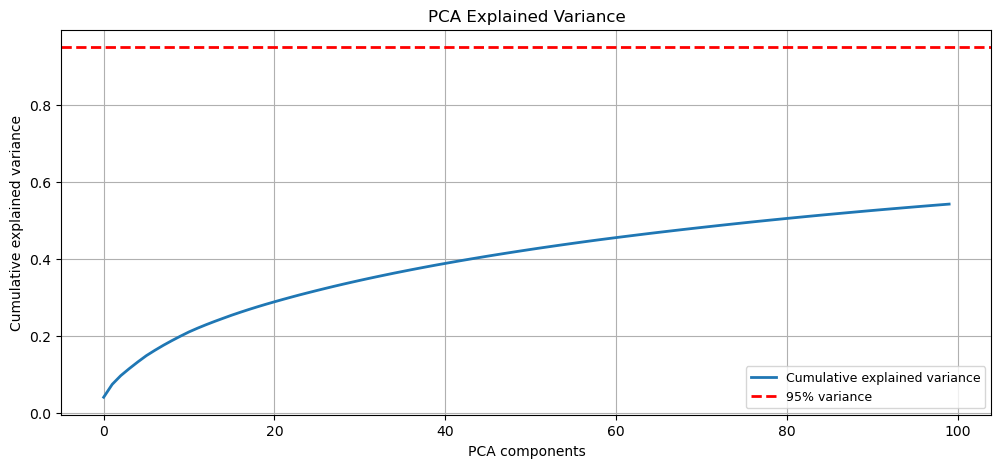

In [55]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), label = 'Cumulative explained variance', linewidth = 2)
plt.xlabel("PCA components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.axhline(0.95, color='red', linestyle='--', label = '95% variance', linewidth = 2)
plt.legend(loc = 'best', prop = {'size' : 9})
plt.show()

## UMAP

In [56]:
# UMAP del PCA
reducer_pca = UMAP(
    n_components = 2,
    #metric = 'cosine',
    #n_neighbors = 50
)
umap_pca = reducer_pca.fit_transform(pca_embeddings, n_jobs = -1)

/usr/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/lib/python3.13/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [31]:
# UMAP de los embeddings crudos
reducer_raw = UMAP(
    n_components = 2,
    #metric = 'cosine',
    #n_neighbors = 50
)
umap_raw = reducer_raw.fit_transform(embeddings, n_jobs = -1)

/usr/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/lib/python3.13/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [57]:
most_frequent = (metadata_GO.iloc[:,3:].sum().sort_values(ascending = False) / len(metadata_GO) * 100)

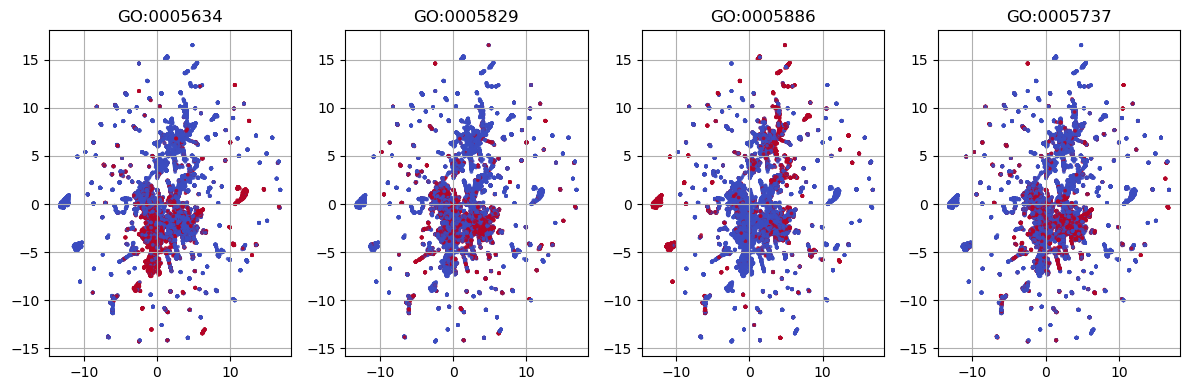

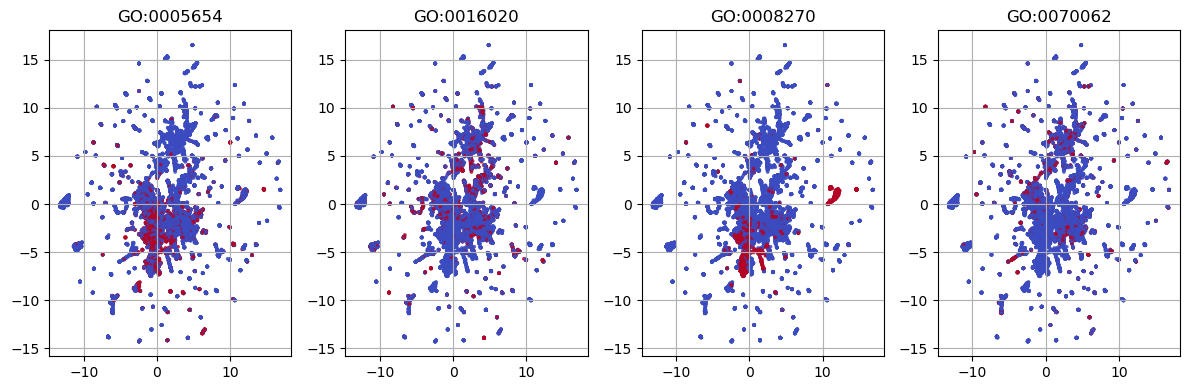

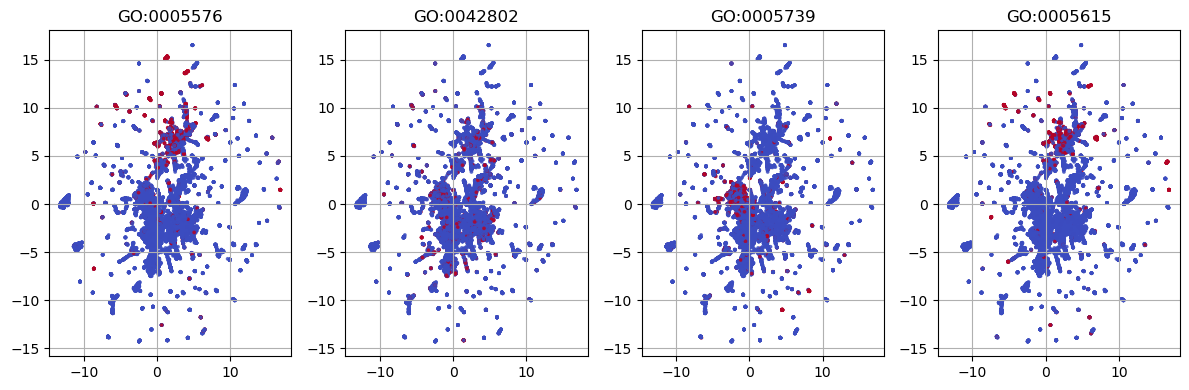

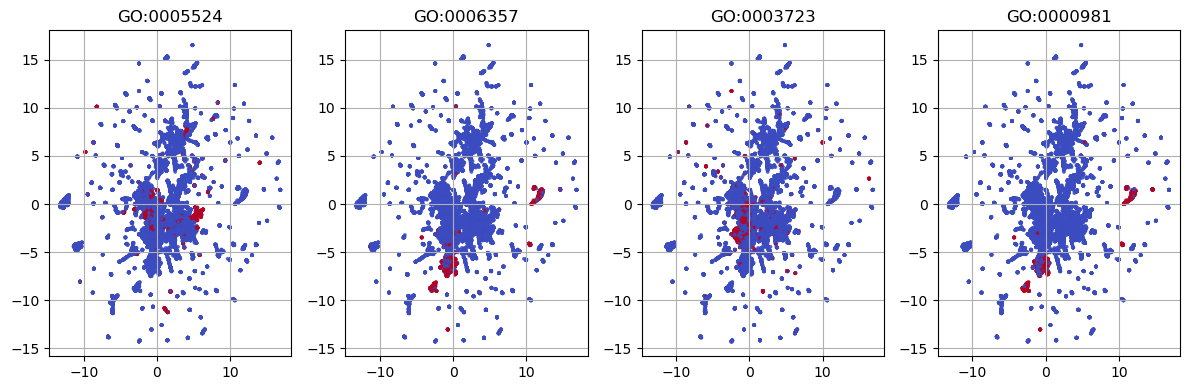

In [83]:
labels = [i for i in most_frequent[:4].index]
fig, axes = plt.subplots(1, len(labels), figsize=(12, 4))
for ax, label in zip(axes, labels):
    ax.grid(visible = True)
    sc = ax.scatter(
        umap_pca[:, 0],
        umap_pca[:, 1],
        c=metadata_GO[label],
        s=3,
        alpha=0.75,
        cmap='coolwarm',  # or any suitable colormap
        vmin=0,
        vmax=1
    )
    ax.set_title(label)
    #plt.colorbar(sc, ax=ax)

plt.tight_layout()
plt.show()

labels = [i for i in most_frequent[4:8].index]
fig, axes = plt.subplots(1, len(labels), figsize=(12, 4))
for ax, label in zip(axes, labels):
    ax.grid(visible = True)
    sc = ax.scatter(
        umap_pca[:, 0],
        umap_pca[:, 1],
        c=metadata_GO[label],
        s=3,
        alpha=0.75,
        cmap='coolwarm',  # or any suitable colormap
        vmin=0,
        vmax=1
    )
    ax.set_title(label)
    #plt.colorbar(sc, ax=ax)

plt.tight_layout()
plt.show()

labels = [i for i in most_frequent[8:12].index]
fig, axes = plt.subplots(1, len(labels), figsize=(12, 4))
for ax, label in zip(axes, labels):
    ax.grid(visible = True)
    sc = ax.scatter(
        umap_pca[:, 0],
        umap_pca[:, 1],
        c=metadata_GO[label],
        s=3,
        alpha=0.75,
        cmap='coolwarm',  # or any suitable colormap
        vmin=0,
        vmax=1
    )
    ax.set_title(label)
    #plt.colorbar(sc, ax=ax)

plt.tight_layout()
plt.show()

labels = [i for i in most_frequent[12:16].index]
fig, axes = plt.subplots(1, len(labels), figsize=(12, 4))
for ax, label in zip(axes, labels):
    ax.grid(visible = True)
    sc = ax.scatter(
        umap_pca[:, 0],
        umap_pca[:, 1],
        c=metadata_GO[label],
        s=3,
        alpha=0.75,
        cmap='coolwarm',  # or any suitable colormap
        vmin=0,
        vmax=1
    )
    ax.set_title(label)
    #plt.colorbar(sc, ax=ax)

plt.tight_layout()
plt.show()

## Clasificación

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

In [73]:
metadata_GO

,Entry,Accession,Organism,GO:0000002,GO:0000009,GO:0000012,GO:0000014,GO:0000015,GO:0000016,GO:0000017,...,GO:2001288,GO:2001294,GO:2001295,GO:2001299,GO:2001301,GO:2001302,GO:2001303,GO:2001304,GO:2001306,GO:2001311
3,1433B_HUMAN,P31946,Homo sapiens (Human).,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1433E_HUMAN,P62258,Homo sapiens (Human).,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1433F_HUMAN,Q04917,Homo sapiens (Human).,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1433G_HUMAN,P61981,Homo sapiens (Human).,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,1433S_HUMAN,P31947,Homo sapiens (Human).,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36123,ZY11A_HUMAN,Q6WRX3,Homo sapiens (Human).,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36124,ZY11B_HUMAN,Q9C0D3,Homo sapiens (Human).,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36126,ZYX_HUMAN,Q15942,Homo sapiens (Human).,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36128,ZZEF1_HUMAN,O43149,Homo sapiens (Human).,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
print(embeddings.shape)
print(pca_embeddings.shape)

(19383, 5120)
(19383, 100)


In [146]:
#annotations = [
#    'GO:0005634',
#    'GO:0005886',
#    'GO:0005829',
#    'GO:0008270',
#    'GO:0006357'
#]

annotations = [i for i in most_frequent[:20].index]

full_metrics = pd.DataFrame()

for annot in tqdm(annotations):
    
    X_train, X_test, y_train, y_test = train_test_split(
        #embeddings[:], # X
        pca_embeddings[:],
        metadata_GO[[annot]][:].values, # Regulación de transcripción a través de RNApol II
        test_size = 0.25
    )

    model = RandomForestClassifier(
        random_state = 1,
        n_jobs = -1,
        class_weight = 'balanced' # Hay un desequilibrio extremo de clases
        #class_weight = 'balanced_subsample'
    )
    
    #model = lgb.LGBMClassifier(
    #    n_jobs = -1,
    #    objective = 'binary',
    #    class_weight = 'balanced',
    #    random_state = 1
    #)
    
    if y_test.shape[1] == 1:
        model.fit(X_train, np.ravel(y_train))
        y_pred = model.predict(X_test)
        
    elif y_test.shape[1] > 1:
        # Predecir múltiples funciones a la vez (Y DEBE SER MULTIDIMENSIONAL!)
        # Entrena el modelo interno una vez por cada etiqueta
        clf = MultiOutputClassifier(model)
        clf.fit(X_train, np.ravel(y_train))
        y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)# Inútil: sale siempre alta porque casi todas las ocurrencias son '0'

    if y_test.shape[1] == 1:
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        metrics = {
            'Accuracy' : acc,
            'F1' : f1,
            'Precision' : precision,
            'Recall' : recall
        }

    elif y_test.shape[1] > 1:

        f1_micro = f1_score(y_test, y_pred, average = 'micro')
        f1_macro = f1_score(y_test, y_pred, average = 'macro')

        hamming = hamming_loss(y_test, y_pred)

        precision_micro = precision_score(y_test, y_pred, average = 'micro')
        recall_micro = recall_score(y_test, y_pred, average = 'micro')

        precision_macro = precision_score(y_test, y_pred, average = 'macro')
        recall_macro = recall_score(y_test, y_pred, average = 'macro')

        metrics = {
            'Accuracy' : acc,
            'F1 micro' : f1_micro,
            'F1 macro' : f1_macro,
            
            'Hamming' : hamming,
            
            'Precision (micro)' : precision_micro,
            'Recall (micro)' : recall_micro,
            
            'Precision (macro)' : precision_macro,
            'Recall (macro)' : recall_macro,
        }

    metrics = pd.DataFrame([metrics])
    metrics['GO'] = annot
    
    full_metrics = pd.concat([
        full_metrics,
        metrics
    ])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [03:05<00:00,  9.26s/it]


In [147]:
import requests
from time import sleep

In [148]:
descriptions = []
for go in tqdm(full_metrics['GO']):
    url = f"https://www.ebi.ac.uk/QuickGO/services/ontology/go/terms/{go}"
    response = requests.get(url, headers={"Accept": "application/json"})
    data = response.json()

    term = data['results'][0]
    #print(term['name'])        # Term name
    descriptions.append(term['name'])
    #print(term.get('definition', 'No definition available'))
    sleep(10)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [03:34<00:00, 10.72s/it]


In [151]:
full_metrics['GO_desc'] = descriptions

In [153]:
full_metrics.sort_values(['F1','Precision', 'Recall'], ascending = False).reset_index(drop = True).round(2)

,Accuracy,F1,Precision,Recall,GO,GO_desc
0,0.98,0.85,0.91,0.80,GO:0000981,"DNA-binding transcription factor activity, RNA..."
1,0.97,0.78,0.86,0.72,GO:0006357,regulation of transcription by RNA polymerase II
2,0.97,0.77,0.97,0.65,GO:0005524,ATP binding
3,0.96,0.77,0.98,0.64,GO:0008270,zinc ion binding
4,0.98,0.72,0.91,0.60,GO:0000785,chromatin
5,0.87,0.72,0.87,0.62,GO:0005886,plasma membrane
6,0.84,0.69,0.83,0.59,GO:0005634,nucleus
7,0.95,0.65,0.90,0.51,GO:0005615,extracellular space
8,0.79,0.56,0.76,0.45,GO:0005829,cytosol
9,0.95,0.56,0.92,0.40,GO:0005739,mitochondrion
